In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


## Install Libraries

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation

In [248]:
df = pd.read_csv("/kaggle/input/wine-quality/winequalityN.csv")

In [249]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [250]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Data Preprocessing

In [252]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [253]:
## We have to fill the missing values
##Return a Series containing counts of unique rows in the DataFrame.
df["fixed acidity"].value_counts()

6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
3.90       1
3.80       1
6.45       1
4.50       1
12.10      1
Name: fixed acidity, Length: 106, dtype: int64

In [254]:
## impute with mean for numerical values and for categorical with mode
## Fill NA/NaN values using the specified method.
mean = df["fixed acidity"].mean()
df["fixed acidity"].fillna(mean, inplace = True)
df["fixed acidity"].isnull().sum()

0

In [255]:
mean2 = df["volatile acidity"].mean()
df["volatile acidity"].fillna(mean, inplace = True)
df["volatile acidity"].isnull().sum()

0

In [256]:
mean3 = df["citric acid"].mean()
df["citric acid"].fillna(mean,inplace=True)
df["citric acid"].isnull().sum()

0

In [257]:
mean4 = df["residual sugar"].mean()
df["residual sugar"].fillna(mean,inplace=True)
df["residual sugar"].isnull().sum()

0

In [258]:
mean5 = df["chlorides"].mean()
df["chlorides"].fillna(mean,inplace=True)
df["chlorides"].isnull().sum()

0

In [259]:
mean6 = df["pH"].mean()
df["pH"].fillna(mean,inplace=True)
df["pH"].isnull().sum()

0

In [260]:
mean7 = df["sulphates"].mean()
df["sulphates"].fillna(mean,inplace=True)
df["sulphates"].isnull().sum()

0

In [261]:
df.isnull().sum()
## Successfully imputed missing values with mean

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Graphs and Visualizations

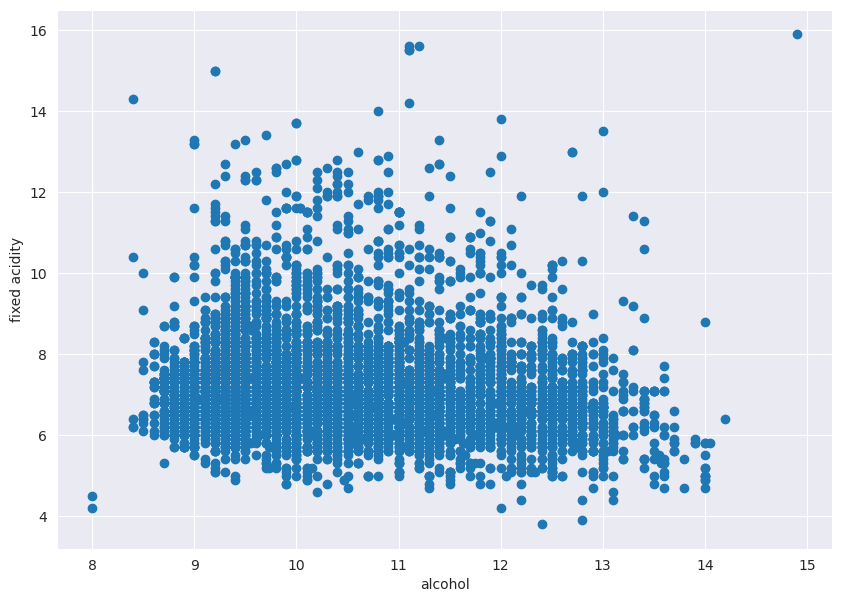

In [262]:
plt.figure(figsize = (10, 7))
plt.scatter(x = "alcohol", y = "fixed acidity", data = df)
plt.xlabel("alcohol")
plt.ylabel("fixed acidity")
plt.show()

[]

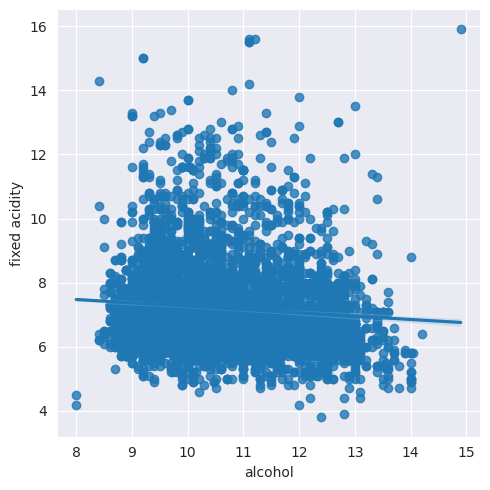

In [263]:
## seaborn.lmplot() method is used to draw a scatter plot with regression line
sns.lmplot(x = "alcohol", y = "fixed acidity", data = df)
plt.plot()

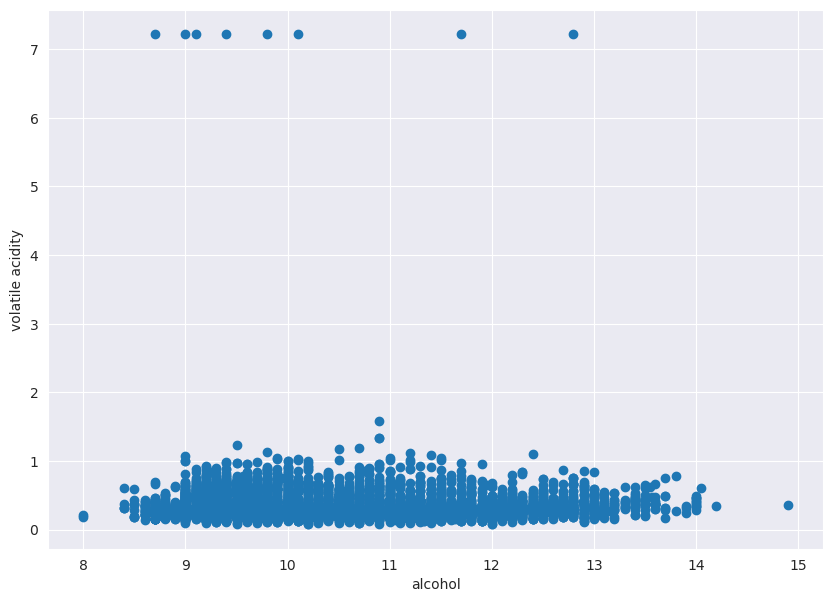

In [264]:
plt.figure(figsize = (10, 7))
plt.scatter(x = "alcohol", y = "volatile acidity", data = df)
plt.xlabel("alcohol")
plt.ylabel("volatile acidity")
plt.show()
## There are significant outliers present here

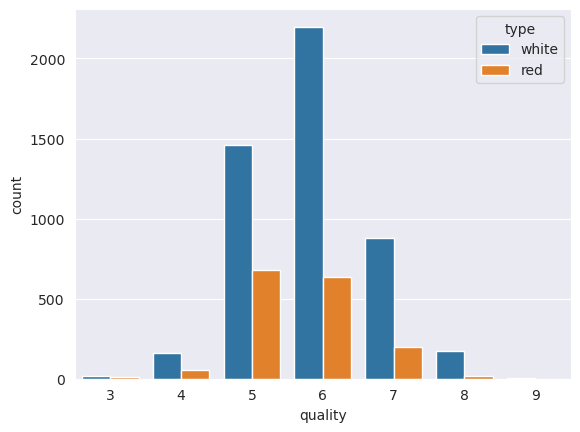

In [265]:
sns.set_style(style="darkgrid") # set theme
sns.countplot(x = "quality",hue="type", data = df) # Show the counts of observations in each categorical bin using bars.
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


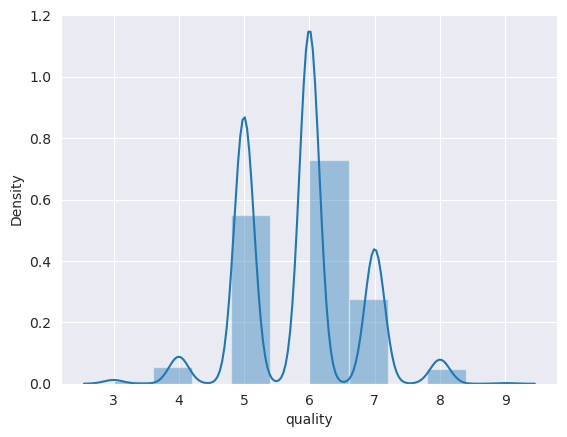

In [266]:
sns.distplot(df["quality"],bins=10)
plt.show()

<Figure size 1000x700 with 0 Axes>

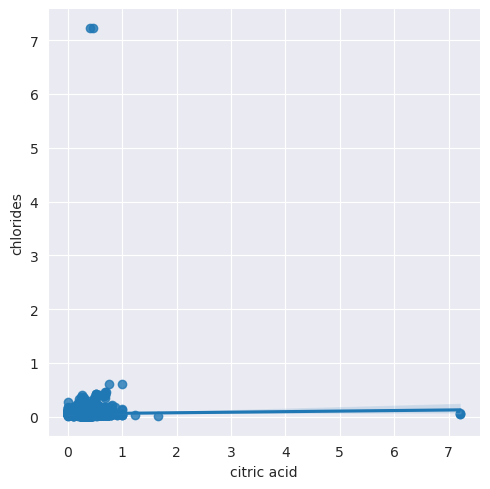

In [267]:
plt.figure(figsize=(10,7))
sns.lmplot(x = "citric acid", y = "chlorides", data = df)
plt.show()

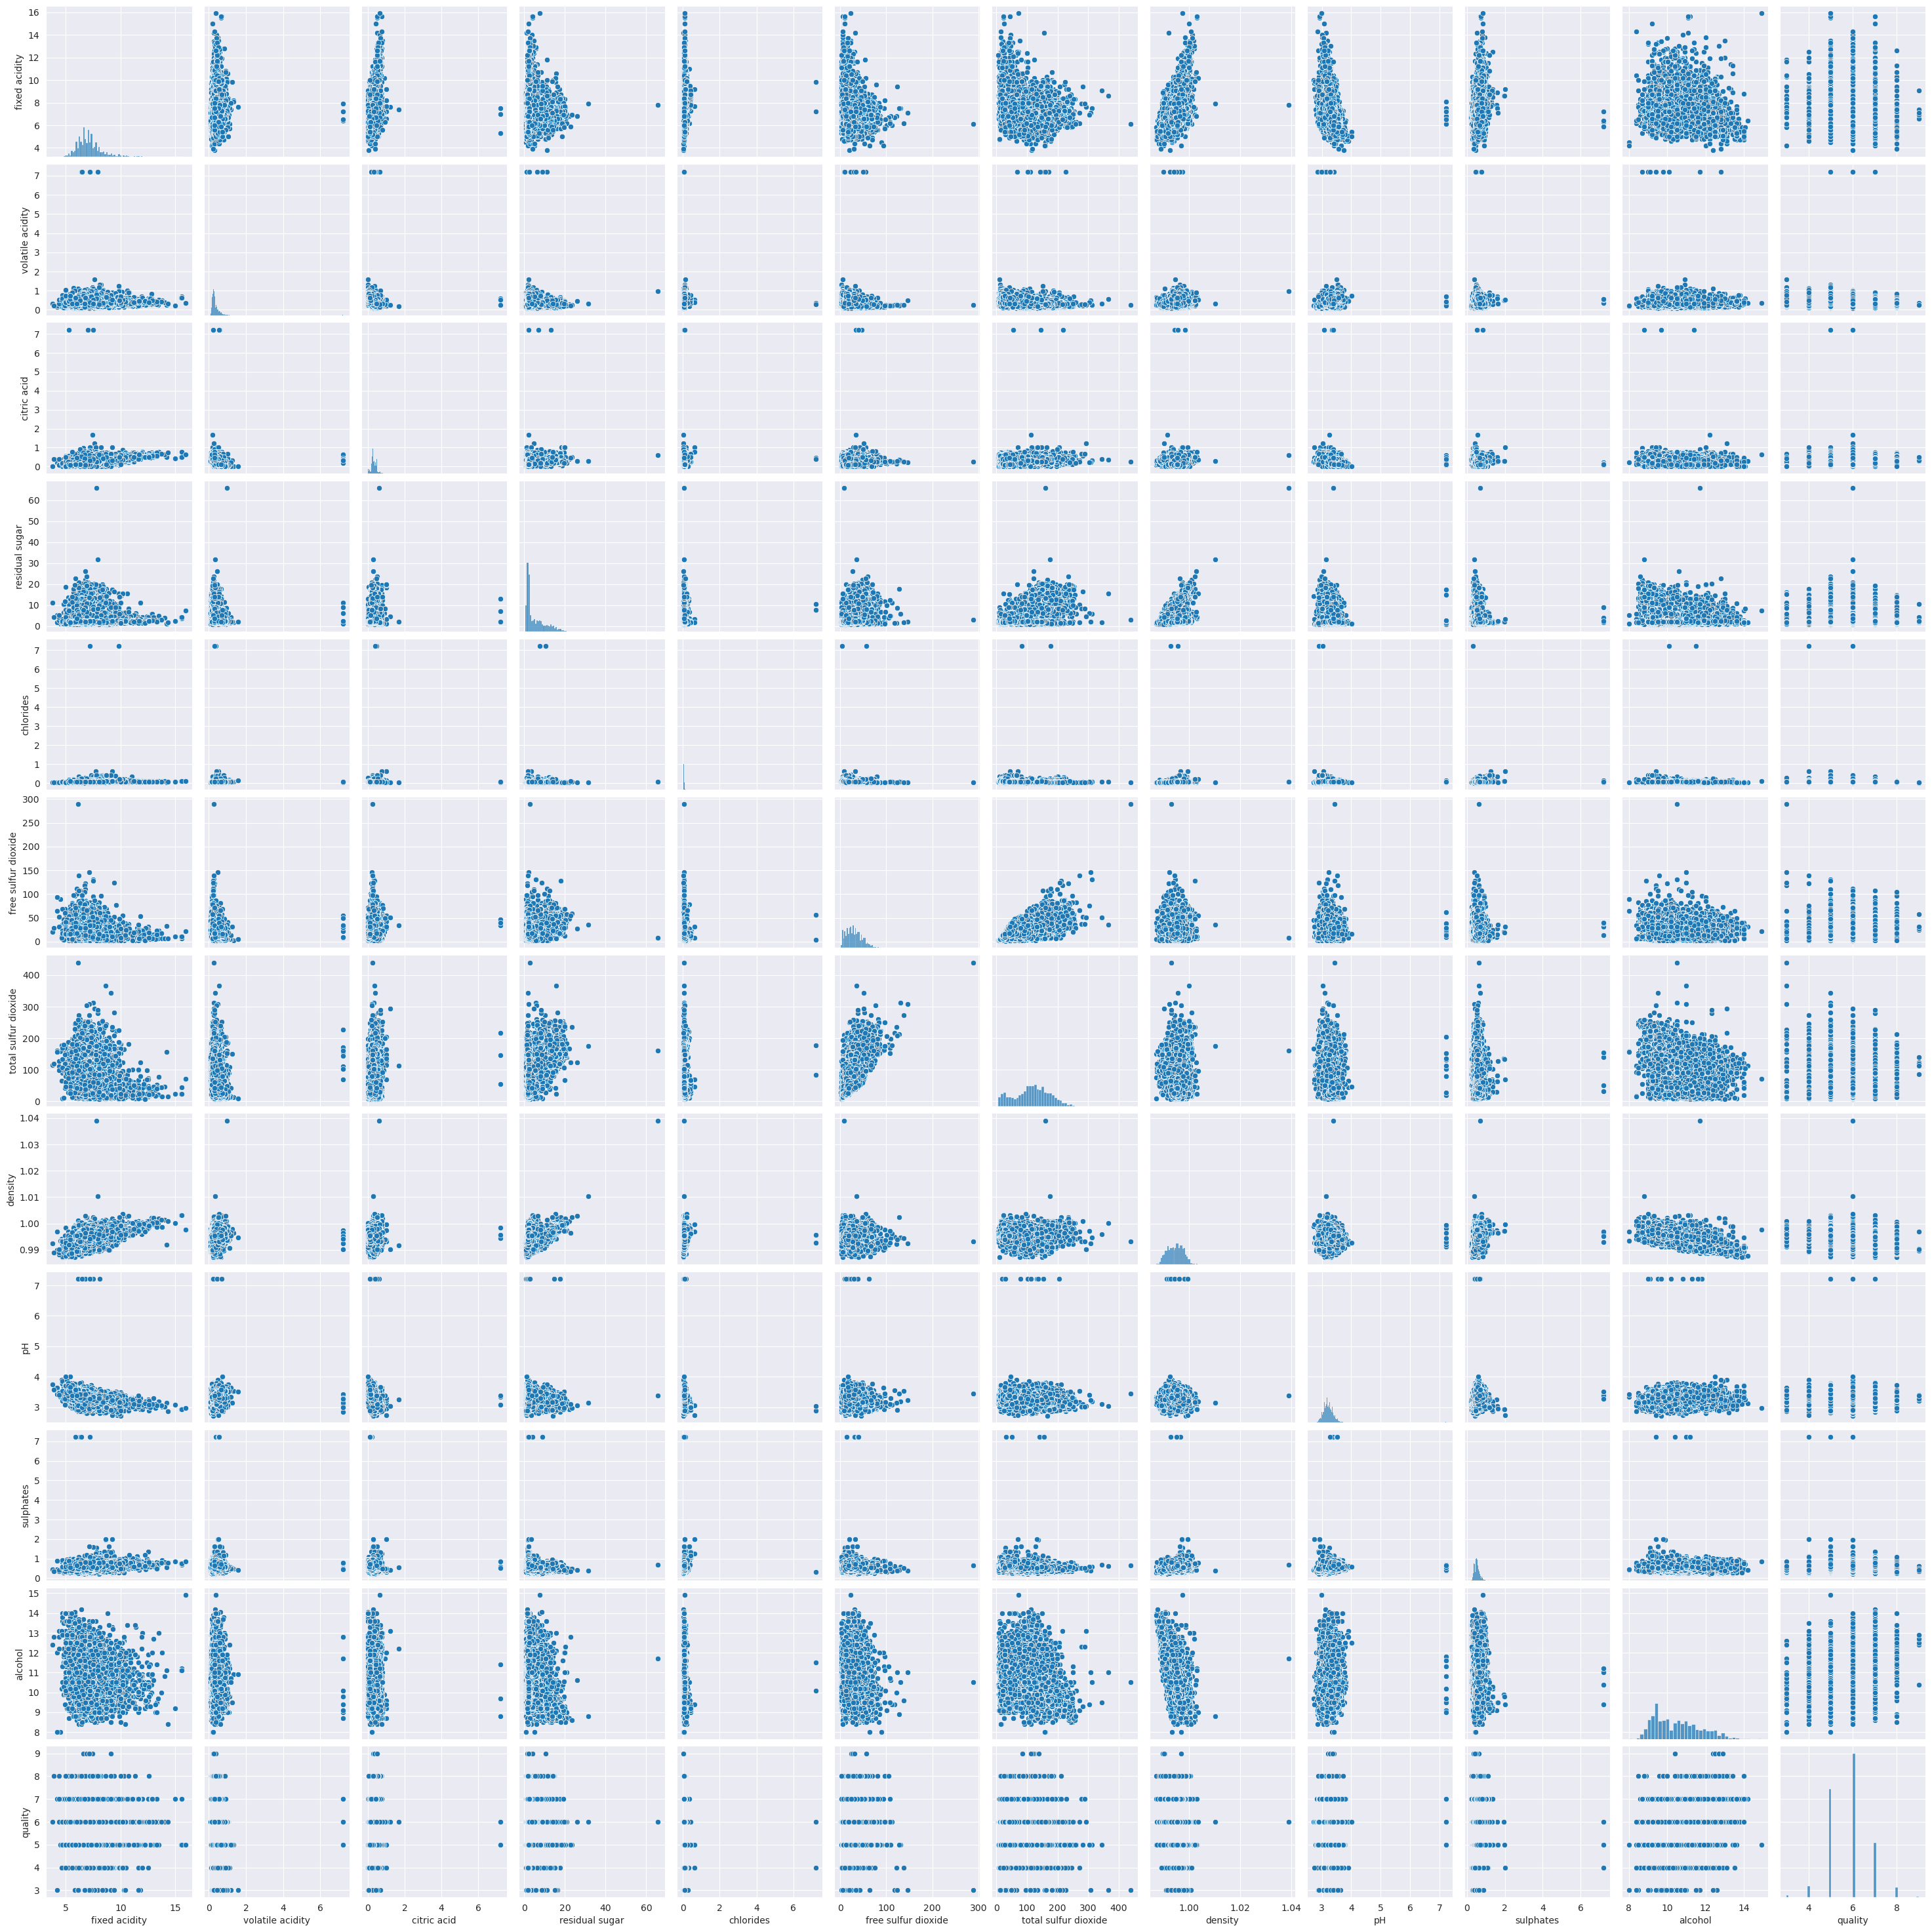

In [268]:
# Plot pairwise relationships in a dataset.
# plt.figure(figsize=(7,4)) 
sns.pairplot(df)
plt.show()

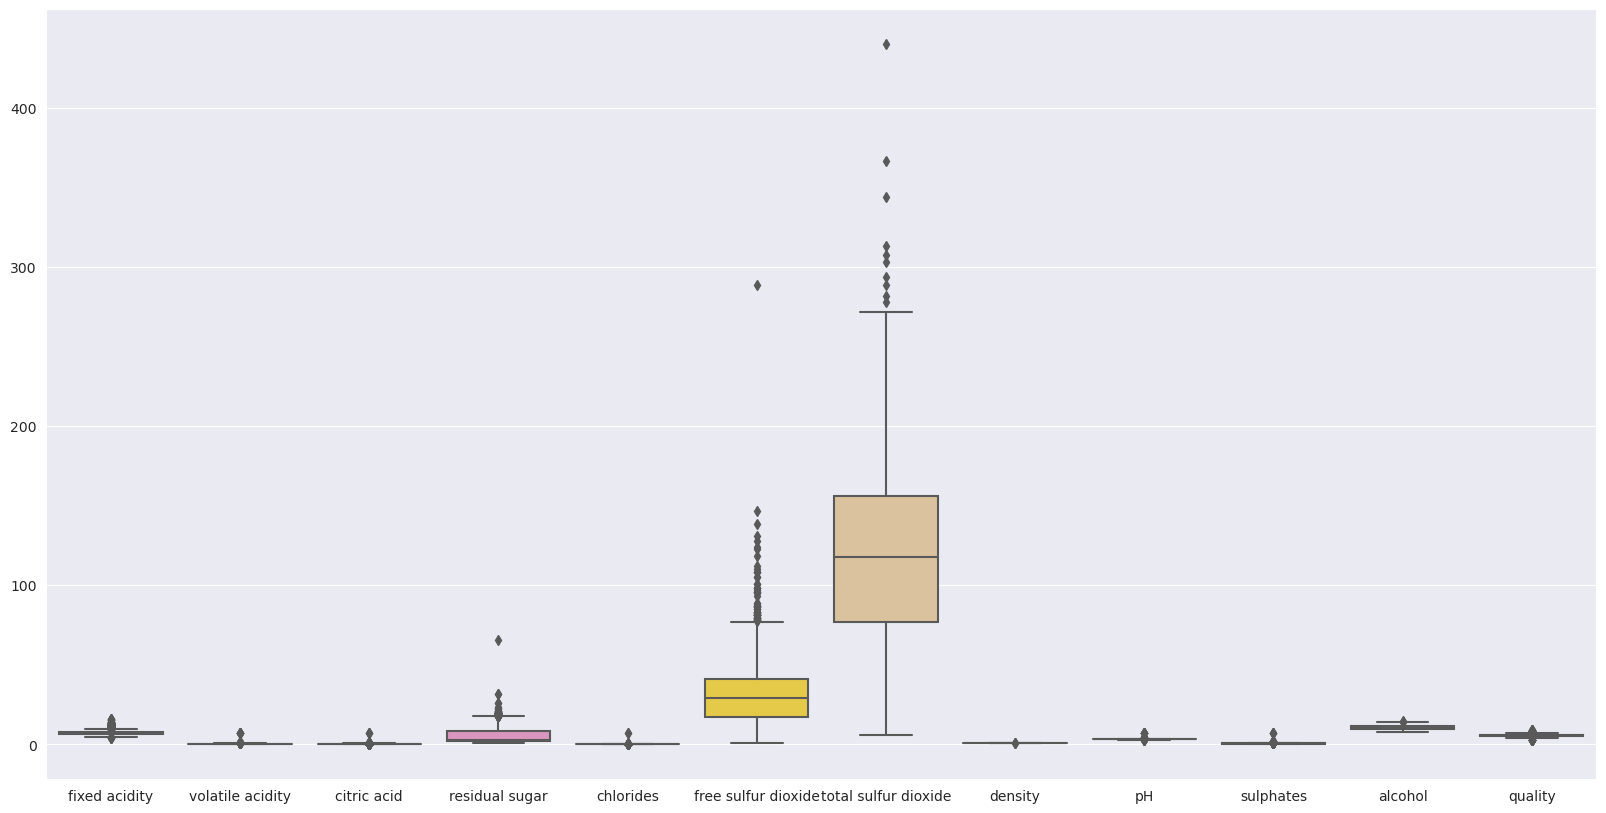

In [269]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df, palette = "Set2")
plt.show()

## Remove Outliers

In [270]:
Q1 = df["free sulfur dioxide"].quantile(0.25)
print(Q1)

17.0


In [271]:
Q3 = df["free sulfur dioxide"].quantile(0.75)
print(Q3)

41.0


In [272]:
IQR = Q3 - Q1
print(IQR)

24.0


In [273]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-19.0 77.0


In [274]:
df["free sulfur dioxide"].shape

(6497,)

In [275]:
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]

In [276]:
df2["free sulfur dioxide"].shape

(6430,)

In [277]:
df.shape[0] - df2.shape[0]

67

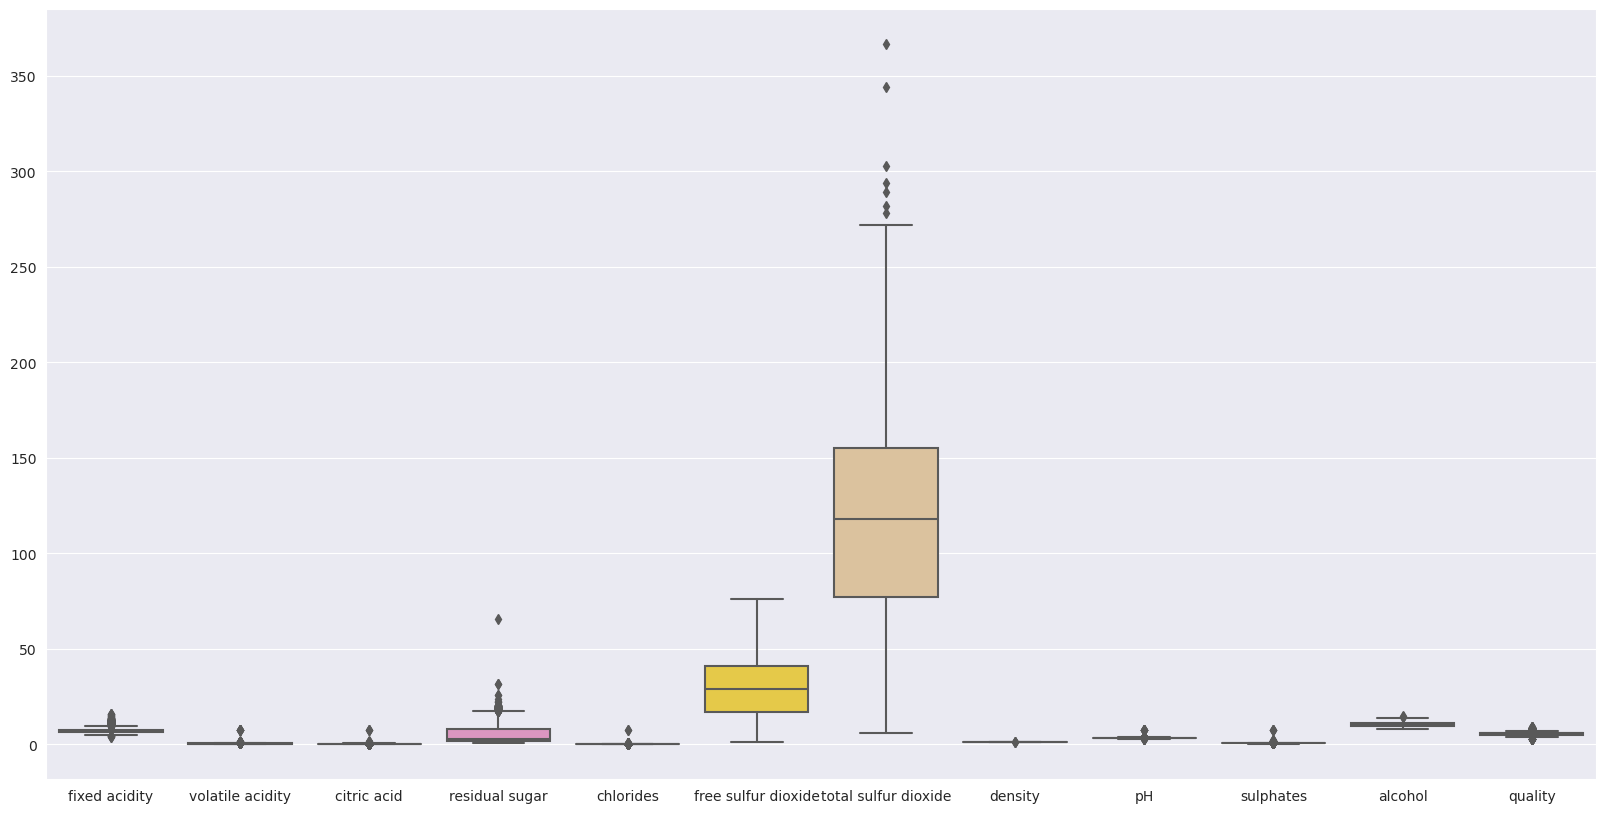

In [278]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df2, palette = "Set2")
plt.show()

In [279]:
df2.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [280]:
Q1 = df2["total sulfur dioxide"].quantile(0.25)
print(Q1)

77.0


In [281]:
Q3 = df2["total sulfur dioxide"].quantile(0.75)
print(Q3)

155.0


In [282]:
IQR = Q3 - Q1
print(IQR)

78.0


In [283]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-40.0 272.0


In [284]:
df2["total sulfur dioxide"].shape

(6430,)

In [285]:
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]

In [286]:
df3["total sulfur dioxide"].shape

(6422,)

In [287]:
df2.shape[0] - df3.shape[0]

8

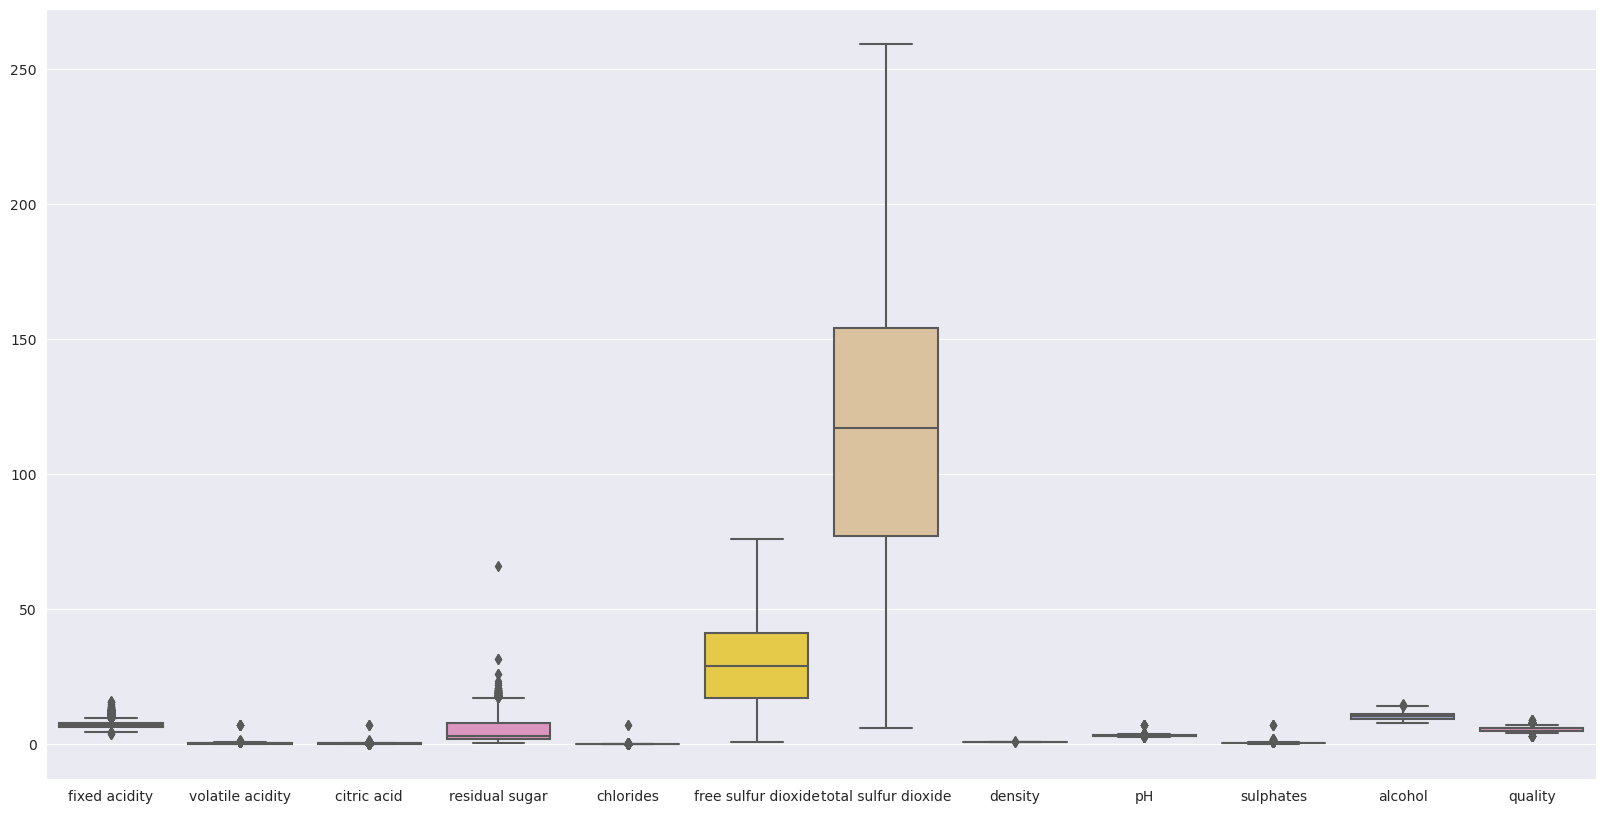

In [288]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df3, palette = "Set2")
plt.show()

In [289]:
df3.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [290]:
Q1 = df3["residual sugar"].quantile(0.25)
print(Q1)

1.8


In [291]:
Q3 = df3["residual sugar"].quantile(0.75)
print(Q3)

8.0


In [292]:
IQR = Q3 - Q1
print(IQR)

6.2


In [293]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-7.500000000000001 17.3


In [294]:
df3["residual sugar"].shape

(6422,)

In [295]:
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]

In [296]:
df4["residual sugar"].shape

(6278,)

In [297]:
df3.shape[0] - df4.shape[0]

144

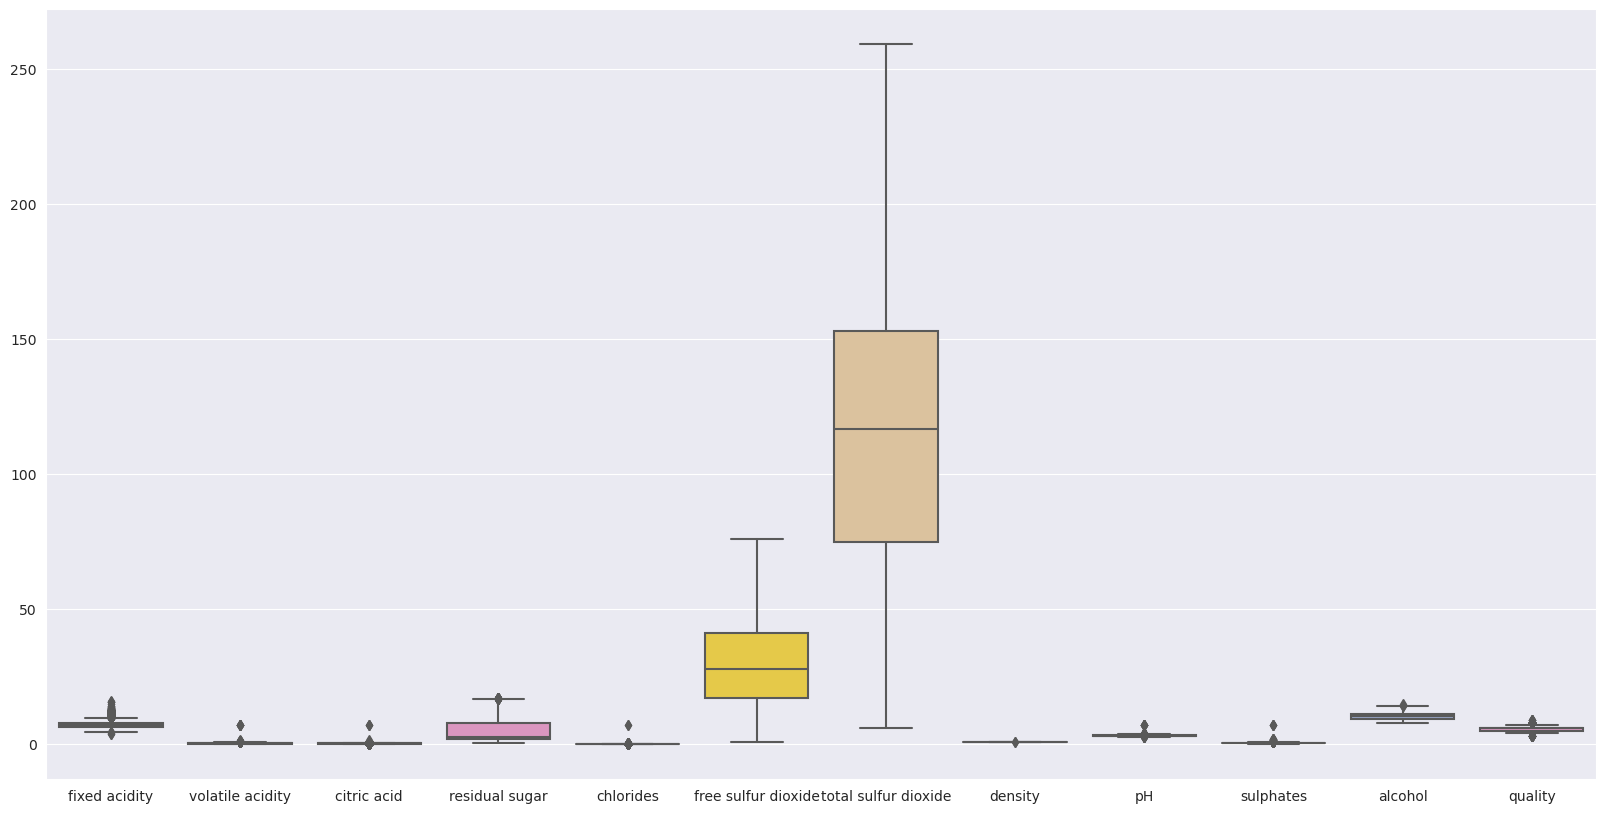

In [298]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df4, palette = "Set2")
plt.show()

In [299]:
df4.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [300]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6278 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6278 non-null   object 
 1   fixed acidity         6278 non-null   float64
 2   volatile acidity      6278 non-null   float64
 3   citric acid           6278 non-null   float64
 4   residual sugar        6278 non-null   float64
 5   chlorides             6278 non-null   float64
 6   free sulfur dioxide   6278 non-null   float64
 7   total sulfur dioxide  6278 non-null   float64
 8   density               6278 non-null   float64
 9   pH                    6278 non-null   float64
 10  sulphates             6278 non-null   float64
 11  alcohol               6278 non-null   float64
 12  quality               6278 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 686.7+ KB


In [301]:
# Convert categorical variable into dummy/indicator variables.
dummies = pd.get_dummies(df4["type"], drop_first = True)

In [302]:
df4 = pd.concat([df4, dummies], axis = 1)

In [303]:
df4.drop("type",axis=1,inplace=True)

In [304]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1


In [305]:
df4.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,7.216579,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.660000,11.0,6,0


## Mapping "quality" with 3 classes
 We want the quality 0, 1, 2 class

In [306]:
df4.quality.value_counts()

6    2742
5    2041
7    1064
4     213
8     188
3      25
9       5
Name: quality, dtype: int64

In [307]:
quality_map = {3 : "Low",4 : "Low", 5 : "Medium", 6 : "Medium", 7 : "Medium", 8 : "High", 9 : "High"}
df4["quality"] = df4["quality"].map(quality_map)

In [308]:
df4.quality.value_counts()

Medium    5847
Low        238
High       193
Name: quality, dtype: int64

In [309]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1


In [310]:
df4.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,Medium,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,7.216579,11.2,Medium,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,Medium,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,Medium,0
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.660000,11.0,Medium,0


In [311]:
map_quality = {"Low" : 0, "Medium" : 1, "High" : 2}
df4["quality"] = df4["quality"].map(map_quality)

In [312]:
df4.quality.value_counts()

1    5847
0     238
2     193
Name: quality, dtype: int64

In [313]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1


## Feature Selection through ExtraTreesClassifier

In [314]:
X = df4.drop("quality", axis = True)
y = df4["quality"]

In [315]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X, y)

ExtraTreesClassifier()

In [316]:
print(etc.feature_importances_)

[0.08426737 0.1048581  0.08486836 0.08870382 0.0864684  0.10339352
 0.08532839 0.08648667 0.08382414 0.09011281 0.09384716 0.00784126]


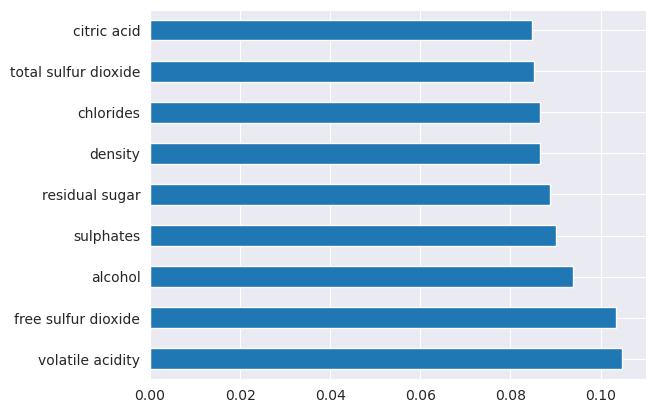

In [317]:
feature_importances = pd.Series(etc.feature_importances_, index = X.columns)
feature_importances.nlargest(9).plot(kind = "barh")
plt.show()

## Model Selection

In [318]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [319]:
model_params = {
    "svm" : {
        "model" : SVC(gamma = "auto"),
        "params" :{
            'C' : [1, 10, 15, 20],
            'kernel' : ["rbf"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
        
    },
    
     "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }
}

In [320]:
score = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv = 10, return_train_score= False)
    clf.fit(X, y)
    score.append({
        "Model" : model_name,
        "Best_Score" : clf.best_score_,
        "Best_Params" : clf.best_params_
    })

In [321]:
df5 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [322]:
df5

,Model,Best_Score,Best_Params
0,svm,0.930551,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.921948,"{'criterion': 'gini', 'max_depth': 5}"
2,random_forest,0.930870,"{'max_depth': 5, 'n_estimators': 10}"
3,naive_bayes,0.641688,{}
4,logistic_regression,0.930711,{'C': 1}


## Training the SVM Model

In [323]:
from sklearn.model_selection import cross_val_score
clf_svm = SVC(kernel="rbf",C=1)
scores = cross_val_score(clf_svm,X,y,cv=10,scoring="accuracy")

In [324]:
scores

array([0.93152866, 0.93152866, 0.93152866, 0.93152866, 0.93152866,
       0.93152866, 0.93152866, 0.92993631, 0.93141946, 0.93141946])

In [325]:
scores.mean()

0.9313475858145652

In [326]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [327]:
clf_svm1 = SVC(kernel="rbf",C=1)
clf_svm1.fit(X_train,y_train)

SVC(C=1)

## Testing SVM

In [328]:
y_pred = clf_svm1.predict(X_test)

In [329]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(cm)

[[   0   53    0]
 [   0 1167    0]
 [   0   36    0]]


In [330]:
print(accuracy)

0.929140127388535


In [331]:
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [332]:
accuracy_dataframe

,y_test,y_pred
4077,1,1
306,1,1
5044,1,1
1620,1,1
698,1,1
...,...,...
3889,1,1
5,1,1
2119,0,1
2851,1,1


## Training the Logistic Regression Model

Feature Scaling was done for Logistic Regression model, because max iterations capacity reached warning

In [333]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [334]:
from sklearn.linear_model import LogisticRegression
clf_logi = LogisticRegression(C = 1)
clf_logi.fit(X_train, y_train)

LogisticRegression(C=1)

## Testing Logistic Regression

In [335]:
y_pred2 = clf_logi.predict(X_test)

In [336]:
cm2 = confusion_matrix(y_test, y_pred2)
accuracy2 = accuracy_score(y_test,y_pred2)
print(cm2)

[[   0   53    0]
 [   0 1167    0]
 [   0   36    0]]


In [337]:
print(accuracy2)

0.929140127388535


In [338]:
accuracy_dataframe2 = pd.DataFrame({"y_test": y_test, "y_pred": y_pred2})

In [339]:
accuracy_dataframe2

,y_test,y_pred
4077,1,1
306,1,1
5044,1,1
1620,1,1
698,1,1
...,...,...
3889,1,1
5,1,1
2119,0,1
2851,1,1


## Training Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(max_depth = 5, n_estimators = 10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

## Testing Random Forest

In [341]:
y_pred3 = clf_forest.predict(X_test)

In [342]:
cm3 = confusion_matrix(y_test, y_pred3)
accuracy3 = accuracy_score(y_test,y_pred3)

In [343]:
print(cm3)

[[   0   53    0]
 [   2 1165    0]
 [   0   36    0]]


In [344]:
print(accuracy3)

0.927547770700637


In [345]:
accuracy_dataframe3 = pd.DataFrame({"y_test": y_test, "y_pred": y_pred3})

In [346]:
accuracy_dataframe3

,y_test,y_pred
4077,1,1
306,1,1
5044,1,1
1620,1,1
698,1,1
...,...,...
3889,1,1
5,1,1
2119,0,1
2851,1,1
